In [2]:
filename=open('2_himalayas.txt','r')
read_filename=filename.read()
hymalias=list(read_filename.split('\n'))
first_line=hymalias[0]
list_1st_line=first_line.split()

In [3]:
list_1st_line

['600', '400', '68', '18']

In [4]:
map=hymalias[int(list_1st_line[2])+1:-1]
target_point=[]
for i in hymalias[1:int(list_1st_line[2])+1]:
    X,Y,point_=i.split()
    target_point.append([int(X),int(Y)])


In [5]:
mountain_=[]
water=[]
traffic_jam=[]
dirt=[]
rail_cros=[]
standard=[]
highway=[]
railway=[]
for i in range(len(map)):
    line=map[i]
    for k in range(len(line)):
        character=line[k]
        if character=='#':
            mountain_.append([i,k])
        elif character=='~':
            water.append([i,k])
        elif character=='*':
            traffic_jam.append([i,k])
        elif character=='+':
            dirt.append([i,k])
        elif character=='X':
            rail_cros.append([i,k])
        elif character=='_':
            standard.append([i,k])
        elif character=='H':
            highway.append([i,k])
        elif character=='T':
            railway.append([i,k])


In [6]:
import numpy as np
mountain_=np.asarray(mountain_)
water=np.asarray(water)
traffic_jam=np.asarray(traffic_jam)
dirt=np.asarray(dirt)
rail_cros=np.asarray(rail_cros)
standard=np.asarray(standard)
highway=np.asarray(highway)
railway=np.asarray(railway)
map_vector=[mountain_,water,traffic_jam,dirt,rail_cros,standard,highway,railway]

In [7]:
def initmeans():
    init_means=[]
    for time in range(int(list_1st_line[3])):
        init_means_cluster = np.random.randn(1,2)
        init_means.append(init_means_cluster)
    return np.asarray(init_means)

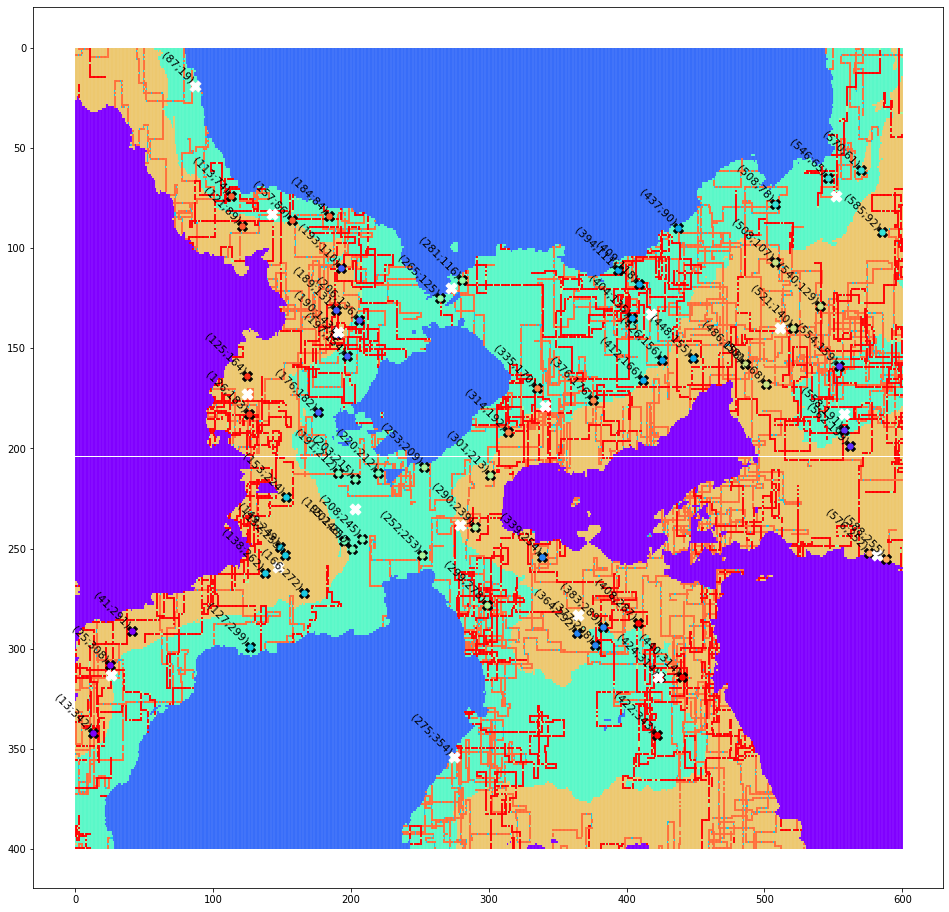

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

colorlist = iter(cm.rainbow(np.linspace(0, 1, len(map_vector))))
fig=plt.figure(figsize=(16.3,16.2))
ax = fig.add_subplot()
for vector in map_vector:
    plt.scatter(vector[:,1],vector[:,0],color=next(colorlist),marker='s',s=1)
for i in target_point:
    plt.scatter(i[0],i[1],marker='X',color='black',s=100)
    ax.text(i[0],i[1],'('+str(i[0])+';'+str(i[1])+')',size=11,rotation=-45,
            color='black',
            verticalalignment='bottom',
            horizontalalignment='right')

r=500
clustering_err = np.zeros(r,)
cluster_assignment = np.zeros((r, int(list_1st_line[2])), dtype=np.int32)
cluster_center=np.zeros((r,18,2 ),dtype=np.int32)

for time in range(r):
    k_means = KMeans(n_clusters = int(list_1st_line[3]), max_iter = 100).fit(target_point) 
    cluster_means = k_means.cluster_centers_
    cluster_indices = k_means.labels_ 
    clustering_err[time]=k_means.inertia_/int(list_1st_line[3])
    cluster_assignment[time]=k_means.predict(target_point).reshape(1,-1)
    cluster_center[time]=k_means.cluster_centers_
min_ind=np.where(clustering_err==clustering_err.min())[0][0]
cluster_means=cluster_center[min_ind]
cluster_indices=cluster_assignment[min_ind]

for i in range(cluster_means.shape[0]):
    for k in range(cluster_means.shape[1]):
        cluster_means[i][k]=round(cluster_means[i][k])
        
target_point_array=np.asarray(target_point)
target_and_label=np.hstack([target_point_array,cluster_indices.reshape(-1,1)])
group=[]
for ind in range(int(list_1st_line[3])):
    group.append(target_and_label[target_and_label[:,2]==ind])
colorlist1 = iter(cm.rainbow(np.linspace(0, 1, len(group))))


for vector in group:
    plt.scatter(vector[:,0],vector[:,1],color=next(colorlist1),marker='o',s=30)

plt.scatter(cluster_means[:,0],cluster_means[:,1],marker='X',s=120,color='white')
plt.gca().invert_yaxis()    
plt.show()

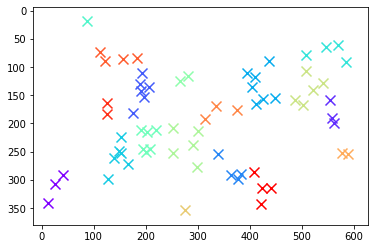

In [15]:
target_point_array=np.asarray(target_point)
target_and_label=np.hstack([target_point_array,cluster_indices.reshape(-1,1)])
group=[]
for ind in range(int(list_1st_line[3])):
    group.append(target_and_label[target_and_label[:,2]==ind])
colorlist1 = iter(cm.rainbow(np.linspace(0, 1, len(group))))
for vector in group:
    plt.scatter(vector[:,0],vector[:,1],color=next(colorlist1),marker='x',s=100)
plt.gca().invert_yaxis()    



In [16]:
testing=[]
for k in range(len(group)):
    matrix=group[k]
    a=np.zeros((1,5))
    for i in range(len(matrix)):
        
        a=np.vstack([a,np.hstack([matrix[i],cluster_means[k]])])
    testing.append(a)

In [23]:
fileee=open('2_himalayas_result.txt','w')

for i in range(len(testing)):
    each_group=testing[i]
    for k in range(1,len(each_group)):
        horizontal_delta=int(each_group[k][0]-each_group[k][-2])
        vertical_delta=int(each_group[k][1]-each_group[k][-1])
        path=''
        form='{} {} {}\n'
        if horizontal_delta==0 and vertical_delta==0:
            fileee.write(form.format(int(each_group[k][-2])-1,int(each_group[k][-1]),'R'))
        elif (horizontal_delta<=0) and (vertical_delta<=0):
            path+='L'*abs(horizontal_delta)
            path+='U'*abs(vertical_delta)
            fileee.write(form.format(int(each_group[k][-2]),int(each_group[k][-1]),path))
        elif (horizontal_delta<=0) and (vertical_delta>=0):
            path+='L'*abs(horizontal_delta)
            path+='D'*abs(vertical_delta)
            fileee.write(form.format(int(each_group[k][-2]),int(each_group[k][-1]),path))
        elif (horizontal_delta>=0) and (vertical_delta<=0):
            path+='R'*abs(horizontal_delta)
            path+='U'*abs(vertical_delta)
            fileee.write(form.format(int(each_group[k][-2]),int(each_group[k][-1]),path))
        elif (horizontal_delta>=0) and (vertical_delta>=0):
            path+='R'*abs(horizontal_delta)
            path+='D'*abs(vertical_delta)
            fileee.write(form.format(int(each_group[k][-2]),int(each_group[k][-1]),path))

In [20]:
len(testing)

18